In [ ]:
서울특별시 공공도서관 (199)

In [ ]:
강북구 gangbuk https://www.gblib.or.kr/gangbuk/event/list.do
관악구 gwanak https://lib.gwanak.go.kr/galib/menu/10028/program/30006/lectureList.do
광진구 gwangjin https://www.gwangjinlib.seoul.kr/intro.do / 프로그램 신청(준비중)...
구로구 guro https://grlib.sen.go.kr/grlib/module/teach/index.do?menu_idx=15&searchCate1=16
금천구 geumcheon https://geumcheonlib.seoul.kr/cop/bbs/selectBoardList.do?bbsId=BBSMSTR_000000000002&menuId=MNU_0000000000000018
노원구 nowon https://connect.nowonlib.kr/function_list
동작구 dongjak https://lib.dongjak.go.kr/dj/module/teach/index.do?menu_idx=32&searchCate1=16
마포구 mapo https://mplib.mapo.go.kr/mcl/MENU1069/PGM3021/lectureList.do
성동구 sd https://www.sdlib.or.kr/SD/edusat/list.do
성북구 sb https://www.sblib.seoul.kr/library/menu/10038/bbs/20001/bbsArticleList.do?currentPageNo=1&bbsArticleIdx=0
종로구 jongno https://lib.jongno.go.kr/bbs/board.php?bo_table=ReadingPgm
중랑구 jungnang https://www.jungnanglib.seoul.kr/library/index.php?g_page=community&m_page=community01

In [30]:
import pandas as pd
jongno_df = pd.DataFrame(columns = ['분관명', '강좌명', '대상', '강좌기간', '강좌장소' ])
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소


In [31]:
from bs4 import BeautifulSoup
import requests


#main_content > div > ul > li > dl > dt > a


ind = 0 #행번호


for i in range(1,24): #range안에는 페이지수, 넉넉하게 넣기 #여기는 15페이지까지 가겠네  
    url = 'https://lib.jongno.go.kr/bbs/board.php?bo_table=ReadingPgm&sfl=wr_subject&sst=wr_num%2Cwr_reply&type=table&page='+str(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
    jongno = requests.get(url, headers = headers)
    bs = BeautifulSoup(jongno.text, 'html.parser')
    
    for j in range(1,6):
        try:
            
            library = bs.select_one('#fboardlist > div > table > tbody > tr:nth-child('+str(j) +') > td:nth-child(2) > div').text
            title = bs.select_one('#fboardlist > div > table > tbody > tr:nth-child('+str(j) +') > td.td_subject > a').text
            target = bs.select_one('#fboardlist > div > table > tbody > tr:nth-child('+str(j) +') > td:nth-child(4)').text
            period =bs.select_one('#fboardlist > div > table > tbody > tr:nth-child('+str(j) +') > td:nth-child(5)').text
            detail_library = bs.select_one('#fboardlist > div > table > tbody > tr:nth-child('+str(j) +') > td:nth-child(6)').text
            jongno_df.loc[ind] = [library, title, target, period, detail_library]
            ind += 1
        except Exception as e:
            print(e)

jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,\r\n 그림책 팝업북 만들기 ...,"초등1,2학년과 보호자",2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,\r\n 감각을 일 깨우는 톡톡 책놀이 ...,유아(5~7세),2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,\r\n 사고력과 표현력을 쑥쑥 키우는 책...,초등학생1~3학년,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,\r\n 독서의 달 행사 <곽재식 작가와의...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,\r\n 독서의 달 행사 <동화로 만나는 ...,초등학생 및 보호자,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,\r\n 독서의 달 행사 <오롯이 독서> ...,초등학생 및 성인,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,\r\n 독서의 달 행사 안내 ...,누구나,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,\r\n 초등고전소설토론 6기 ...,초등 4~6학년,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,\r\n (제10기)그림책으로 만나는 영어...,초등1~4학년,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,\r\n 그림책 팝업북 만들기 (성인 프로...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [32]:
jongno_df['강좌명'] = jongno_df['강좌명'].str.replace('\r', '')
jongno_df['강좌명'] = jongno_df['강좌명'].str.replace('\n', '')
jongno_df['강좌명']

0                              그림책 팝업북 만들기           ...
1                              감각을 일 깨우는 톡톡 책놀이      ...
2                              사고력과 표현력을 쑥쑥 키우는 책놀이  ...
3                              독서의 달 행사 <곽재식 작가와의 만남 ...
4                              독서의 달 행사 <동화로 만나는 클레이>...
5                              독서의 달 행사 <오롯이 독서>     ...
6                              독서의 달 행사 안내           ...
7                              초등고전소설토론 6기           ...
8                              (제10기)그림책으로 만나는 영어스토리텔...
9                              그림책 팝업북 만들기 (성인 프로그램) ...
10                             9월 어린이 독서 동아리         ...
11                             나의첫 심부름 그림책 원화전시회 <마음정...
12                             <괴물이오면>책놀이            ...
13                             서울북스타트 국악이랑 책이랑 참여자 모집...
14                             환경을 위한 업사이클링 북아트      ...
15                             한책읽기 마음버스 책놀이         ...
16                             사고력과 표현력을 쑥쑥 키우는 책놀이 (...
17                             

In [33]:
import re
idx = 0

for i in jongno_df['강좌명']:
    i = re.sub('\[\w+]','',i)
    jongno_df.loc[idx, '강좌명'] = i
    idx += 1
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,그림책 팝업북 만들기 ...,"초등1,2학년과 보호자",2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,감각을 일 깨우는 톡톡 책놀이 ...,유아(5~7세),2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,사고력과 표현력을 쑥쑥 키우는 책놀이 ...,초등학생1~3학년,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,독서의 달 행사 <곽재식 작가와의 만남 ...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,독서의 달 행사 <동화로 만나는 클레이>...,초등학생 및 보호자,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,독서의 달 행사 <오롯이 독서> ...,초등학생 및 성인,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,독서의 달 행사 안내 ...,누구나,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,초등고전소설토론 6기 ...,초등 4~6학년,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,(제10기)그림책으로 만나는 영어스토리텔...,초등1~4학년,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,그림책 팝업북 만들기 (성인 프로그램) ...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [34]:
import re
idx = 0

for i in jongno_df['강좌명']:
    i = re.sub('\[[\w+\s+]+\]','',i)
    jongno_df.loc[idx, '강좌명'] = i
    idx += 1
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,그림책 팝업북 만들기 ...,"초등1,2학년과 보호자",2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,감각을 일 깨우는 톡톡 책놀이 ...,유아(5~7세),2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,사고력과 표현력을 쑥쑥 키우는 책놀이 ...,초등학생1~3학년,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,독서의 달 행사 <곽재식 작가와의 만남 ...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,독서의 달 행사 <동화로 만나는 클레이>...,초등학생 및 보호자,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,독서의 달 행사 <오롯이 독서> ...,초등학생 및 성인,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,독서의 달 행사 안내 ...,누구나,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,초등고전소설토론 6기 ...,초등 4~6학년,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,(제10기)그림책으로 만나는 영어스토리텔...,초등1~4학년,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,그림책 팝업북 만들기 (성인 프로그램) ...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [36]:
jongno_df.drop(index=[114,107], axis = 0 , inplace = True)

In [37]:
jongno_df['강좌명'].unique()

array(['                        그림책 팝업북 만들기                        ',
       '                        감각을 일 깨우는 톡톡 책놀이                        ',
       '                        사고력과 표현력을 쑥쑥 키우는 책놀이                        ',
       '                        독서의 달 행사 <곽재식 작가와의 만남 - 과학으로 보는 문학이야기>                        ',
       '                        독서의 달 행사 <동화로 만나는 클레이>                        ',
       '                        독서의 달 행사 <오롯이 독서>                        ',
       '                        독서의 달 행사 안내                        ',
       '                        초등고전소설토론 6기                        ',
       '                        (제10기)그림책으로 만나는 영어스토리텔링                        ',
       '                        그림책 팝업북 만들기 (성인 프로그램)                        ',
       '                        9월 어린이 독서 동아리                        ',
       '                        나의첫 심부름 그림책 원화전시회 <마음정원 전>                        ',
       '                        <괴물이오면>책놀이                     

In [38]:
pd.set_option('display.max_row', 115)
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,그림책 팝업북 만들기 ...,"초등1,2학년과 보호자",2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,감각을 일 깨우는 톡톡 책놀이 ...,유아(5~7세),2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,사고력과 표현력을 쑥쑥 키우는 책놀이 ...,초등학생1~3학년,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,독서의 달 행사 <곽재식 작가와의 만남 ...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,독서의 달 행사 <동화로 만나는 클레이>...,초등학생 및 보호자,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,독서의 달 행사 <오롯이 독서> ...,초등학생 및 성인,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,독서의 달 행사 안내 ...,누구나,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,초등고전소설토론 6기 ...,초등 4~6학년,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,(제10기)그림책으로 만나는 영어스토리텔...,초등1~4학년,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,그림책 팝업북 만들기 (성인 프로그램) ...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [ ]:
어린이 청소년 성인 중장년 전연령

In [39]:
jongno_df['대상'].unique()

array(['초등1,2학년과 보호자', '유아(5~7세)', '초등학생1~3학년', '성인', '초등학생 및 보호자',
       '초등학생 및 성인', '누구나', '초등 4~6학년', '초등1~4학년', '초등 저학년', '전체',
       '4~5세 영유아와 양육자', '영유아, 부모, 임산부, 관심있는분', '초등학생', '6~7세 유아와 양육자',
       '유치', '초등학생(1~3)', '유아(5~7)', '관심 있는 누구나', '유치, 초등',
       '홀로코스트 문학에 관심 있는 누구나', '초등 1~3학년', '7~9세', '초등 / 청소년 및 성인',
       '초등 5~6학년', '성인, 청소년', '6~7세 영유아', '초등 3학년~초등 4학년', '초등 1학년~3학년',
       '청소년', '초등학생, 청소년, 성인 ', '초등 2~4학년', '도서관 이용자',
       '초등 전학년 및 관심있는 학부모', '유치원', '성인 및 관심 있는 누구나', '청소년 및 성인', '4세~7세',
       '6~10세 어린이 ', '어린이', '초등 고학년 및 청소년', '초등', '어린이와 가족 ',
       '성인(육아 부모 및 웹툰 관심 성인)', '5~7세 영유아와 양육자', '어린이와 가족', '유아',
       '초등 2학년~3학년', '유치,초등', '유아, 초등학생', '어린이 및 성인', '유아 5세~7세',
       '초등1학년~3학년', '유치원,초등학생', '초등학생 4~6 학년', '강연①-학부모 / 강연②-초등3~5학',
       '성인, 초등학생', '종로구민 2인 이상 지역동아리', '초등 고학년(4~6학년)', '전 연령', '성인 ',
       '일반', '임산부와가족', '초4~6학년', '초등전학년', '전연령', '초등생',
       '역사에 관심있는 누구나(초등 이상~)', '관심있는 누구나', '청소년(중·고등학생)', '유아 6-7세 가족',
   

In [ ]:
jongno_df.loc[jongno_df['대상'].str.contains(r"초|어린이|유아"),'대상'] = '어린이'
jongno_df.loc[jongno_df['대상'].str.contains(r"누구나"),'대상'] = '전연령'

In [42]:
jongno_df.loc[0, '대상'] = '전연령'

In [157]:
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,그림책 팝업북 만들기 ...,전연령,2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,감각을 일 깨우는 톡톡 책놀이 ...,어린이,2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,사고력과 표현력을 쑥쑥 키우는 책놀이 ...,어린이,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,독서의 달 행사 <곽재식 작가와의 만남 ...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,독서의 달 행사 <동화로 만나는 클레이>...,전연령,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,독서의 달 행사 <오롯이 독서> ...,전연령,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,독서의 달 행사 안내 ...,전연령,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,초등고전소설토론 6기 ...,어린이,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,(제10기)그림책으로 만나는 영어스토리텔...,어린이,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,그림책 팝업북 만들기 (성인 프로그램) ...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [156]:
jongno_df.loc[111:113, '대상'] = '전연령'

In [162]:
jongno_df['대상'] = jongno_df['대상'].str.replace('성인 ', '성인')

In [163]:
jongno_df['대상'].unique()

array(['전연령', '어린이', '성인', '청소년'], dtype=object)

In [164]:
jongno_df.to_csv('종로구도서관.csv', encoding="utf-8-sig", index=False)

# 워드클라우드

In [165]:
jongno_df

,분관명,강좌명,대상,강좌기간,강좌장소
0,삼청,그림책 팝업북 만들기 ...,전연령,2022-09-03 ~ 2022-09-03,삼청공원숲속도서관
1,평창,감각을 일 깨우는 톡톡 책놀이 ...,어린이,2022-09-05 ~ 2022-09-28,꿈꾸는평창동 작은도서관
2,평창,사고력과 표현력을 쑥쑥 키우는 책놀이 ...,어린이,2022-09-05 ~ 2022-09-28,꿈꾸는평창동작은도서관
3,청운,독서의 달 행사 <곽재식 작가와의 만남 ...,성인,2022-09-21 ~ 2022-09-21,청운문학도서관 다목적실
4,청운,독서의 달 행사 <동화로 만나는 클레이>...,전연령,2022-09-04 ~ 2022-09-04,청운문학도서관 다목적실
5,청운,독서의 달 행사 <오롯이 독서> ...,전연령,2022-09-01 ~ 2022-09-01,청운문학도서관
6,아름꿈,독서의 달 행사 안내 ...,전연령,2022-09-01 ~ 2022-09-30,아름꿈도서관
7,국학,초등고전소설토론 6기 ...,어린이,2022-09-15 ~ 2022-11-17,온라인(Zoom) 강의
8,아름꿈,(제10기)그림책으로 만나는 영어스토리텔...,어린이,2022-09-03 ~ 2022-12-17,아름꿈도서관2층
9,통인,그림책 팝업북 만들기 (성인 프로그램) ...,성인,2022-09-14 ~ 2022-09-21,통인 어린이 작은 도서관


In [166]:
df = jongno_df.copy()

In [167]:
import re
target = df['강좌명'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [168]:
text

' 그림책 팝업북 만들기 감각을 일 깨우는 톡톡 책놀이 사고력과 표현력을 쑥쑥 키우는 책놀이 독서의 달 행사 곽재식 작가와의 만남 과학으로 보는 문학이야기 독서의 달 행사 동화로 만나는 클레이 독서의 달 행사 오롯이 독서 독서의 달 행사 안내 초등고전소설토론 기 제 기 그림책으로 만나는 영어스토리텔링 그림책 팝업북 만들기 성인 프로그램 월 어린이 독서 동아리 나의첫 심부름 그림책 원화전시회 마음정원 전 괴물이오면 책놀이 서울북스타트 국악이랑 책이랑 참여자 모집 환경을 위한 업사이클링 북아트 한책읽기 마음버스 책놀이 사고력과 표현력을 쑥쑥 키우는 책놀이 초등 감각을 일깨우는 톡톡 책 놀이 유치 한 주제로 함께 읽기 한 주제로 함께 읽기 사고력과 표현력을 쑥쑥 키우는 책놀이 감각을 일 깨우는 톡톡 책놀이 청운문학도서관 혜화 작가와의 만남 영화포스터 전시 영화의 얼굴 월 스토리텔링 사회학자와 함께 읽는 홀로코스트 생존자의 서사 문학 배화여고와 함께하는 언니가 읽어주는 그림책 그림책놀이 한 책 독서토론 재밌고 흥겨운 책 이야기 길 위의 인문학 종로의 문학적 사건들 북스타트 연계 프로그램 그림책 놀이터 종로별별책방 어린이 독서토론 교실 여름특집 사서와 함께하는 그림책 퐁당 문학과 역사로 시작하는 나의 이야기 업사이클링 다이어리 만들기 여름방학 특강 내가 한 편의 시가 된다면 숲에서 놀자 한주제로 함께읽기 불편한 편의점 김호연 저자 강연회 사람책과 함께하는 메타버스 북스타트 연계 프로그램 그림책 놀이터 월 스토리텔링 출판사 연계 작가와의 만남 지상으로 올라오지 못한 기억 언더그라운드 그림으로 읽는 동화전 한 주제로 함께 읽기 내 어깨 위 두 친구 이수연 작가와의 만남 마감 월 문화가 있는날 안내 월 어린이 독서 동아리 출판사 연계 작가와의 만남 노자와 니체 철학자에게 삶의 길을 묻다 양육자와 영유아가 함께하는 그림책이랑 놀자 북스타트 연계 프로그램 숲에서 놀자 한 주제로 함께 읽기 김유작가와의 만남 마음버스 타고 놀자 조해진 작가와의 만남 길 위의 인문학 부 강 월 스토

In [170]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df #인덱스 확인해보면서 스탑워드에 추가시키기..

,cnt
독서,17
그림책,12
프로그램,12
작가,9
만남,9
...,...
연암,1
북한,1
남한,1
종로구,1


In [189]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

# 쪼개진것들 빼고 의미있는것들은 담기
noun_list =['북스타트','북큐레이션','리터러시','아티스트웨이','페어런팅','메타버스','타임캡슐','지혜']
stop_word = ['강연','온라인','도서관','회차','스타트','마포','중앙','축제','마중','우리','모집','특강','주간','리터','러시','데이','프로그램','세상','이야기','극장','산울림','추가','살롱','다시','노사','비대','교실','행사','상호',
'이해','기념','보고','대면','마마','토요일','학교','꼬리','투어','사랑','학과','아웃사이더','최초','심화','회원','접수','는가','전환','자료','타임','하루','안내','페어','학년','과정','재개','프로젝트','번지','향후','두창','등부',
'시대','대신','계획','아티스트','웨이','런팅','정리','최고','버스','개발','시선','현재','빈부','격차','활동','메타','캡술','누리','서울','시립','열전','지혜', '청소년기', '자단', '퐁당', '유치', '위해', '산다','이오', '등고', '괴물', '홀로코스트' ,'생존자', '언니', '사건', 
             '시가', '어깨', '노자', '타고', '성찬', '아빠', '오뉴', '목녹', '아름', '린지', '윤독', '여덟', '북극', '북극곰', '바다로', '빨대', '마감', '엄마', '지혜', '톡톡', '종로', '특집', '참여자', '김유', '화전', '여름방학', '배화여고', '편의', '편의점', '시작', '테라', '기별'
             
]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
독서,17
그림책,12
작가,9
만남,9
문학,9
스토리텔링,8
동아리,7
만들기,6
동화,6
인문학,6


In [190]:
pd.set_option('display.max_row', 181)
df

,cnt
독서,17
그림책,12
작가,9
만남,9
문학,9
스토리텔링,8
동아리,7
만들기,6
동화,6
인문학,6


In [174]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

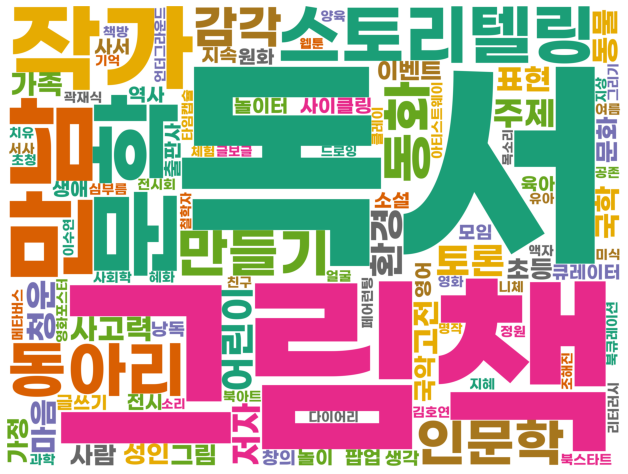

In [191]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시

plt.axis('off') #축 지우기